In [2]:
%pip install --quiet pandas
import pandas as pd
import numpy as np
#Use Pandas when dealing with structured/tabular data, like spreadsheets or CSVs.


[notice] A new release of pip is available: 24.3.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


##### panda Series is a single column of data with labels (index).

In [18]:
arr = np.random.rand(4)
pd.Series(data=arr) 
# create a Series from a numpy array

0    0.598591
1    0.766020
2    0.382433
3    0.192619
dtype: float64

In [19]:
label = ['a', 'b', 'c', 'd']
pd.Series(data=arr, index=label)
# create a Series from a numpy array with custom index labels

a    0.598591
b    0.766020
c    0.382433
d    0.192619
dtype: float64

In [20]:
d = {'a': 1, 'b': 2, 'c': 3}
pd.Series(data=d)
# create a Series from a dictionary

a    1
b    2
c    3
dtype: int64

##### Pandas Dataframe have Multiple columns (each can be a Series).

In [3]:
df = pd.DataFrame(data=np.random.randn(4,3), index=['a','b','c','d'],columns=['X','Y','Z'])
df
# create a DataFrame from a numpy array with custom index and column labels

,X,Y,Z
a,0.184789,-0.598897,-0.841910
b,0.336574,-0.304373,-1.238088
c,1.036566,1.625347,0.755406
d,0.699527,1.043882,0.185518


In [40]:
df['Z']
# access a column in the DataFrame

a    0.552948
b    0.669994
c    1.587475
d   -1.918148
Name: Z, dtype: float64

In [41]:
df[['X','Z']]
# access multiple columns in the DataFrame

,X,Z
a,-0.419500,0.552948
b,0.019528,0.669994
c,-0.523455,1.587475
d,0.364803,-1.918148


In [42]:
df['New'] = df['X'] + df['Y']
df
# add a new column to the DataFrame

,X,Y,Z,New
a,-0.419500,0.057802,0.552948,-0.361697
b,0.019528,0.612037,0.669994,0.631565
c,-0.523455,-0.676943,1.587475,-1.200398
d,0.364803,0.850706,-1.918148,1.215508


In [43]:
df.drop('Y',axis=1,inplace=True)
df
# drop a column from the DataFrame

,X,Z,New
a,-0.419500,0.552948,-0.361697
b,0.019528,0.669994,0.631565
c,-0.523455,1.587475,-1.200398
d,0.364803,-1.918148,1.215508


In [44]:
df.drop('d',axis=0,inplace=True)
df
# drop a row from the DataFrame

,X,Z,New
a,-0.419500,0.552948,-0.361697
b,0.019528,0.669994,0.631565
c,-0.523455,1.587475,-1.200398


In [45]:
df.shape
# get the shape of the DataFrame

(3, 3)

In [46]:
df.loc['a']
# access a row in the DataFrame by label

X     -0.419500
Z      0.552948
New   -0.361697
Name: a, dtype: float64

In [50]:
df.iloc[0]
# access a row in the DataFrame by index position

X     -0.419500
Z      0.552948
New   -0.361697
Name: a, dtype: float64

In [49]:
df.loc['a', 'Z']
# access a specific value in the DataFrame by label

0.5529482867530205

In [ ]:
df>0.2
# create a boolean DataFrame based on a condition

,X,Z,New
a,False,True,False
b,False,True,True
c,False,True,False


In [ ]:
df[df>0.2]
# filter the DataFrame based on a condition

,X,Z,New
a,NaN,0.552948,NaN
b,NaN,0.669994,0.631565
c,NaN,1.587475,NaN


In [53]:
d = {'a': [1,2,np.nan], 'b': [np.nan,2,np.nan], 'c': [1,2,5],}
df = pd.DataFrame(data=d)
df

,a,b,c
0,1.0,NaN,1
1,2.0,2.0,2
2,NaN,NaN,5


In [58]:
df.dropna(axis=0,thresh=1)
# drop rows with less than 1 non-NA value

,a,b,c
0,1.0,NaN,1
1,2.0,2.0,2
2,NaN,NaN,5


In [ ]:
df.dropna(axis=1)
# drop columns with NaN values

,c
0,1
1,2
2,5


In [59]:
df.fillna(value=0)
# fill NaN values with 0

,a,b,c
0,1.0,0.0,1
1,2.0,2.0,2
2,0.0,0.0,5


In [62]:
df['a'].fillna(value=df['a'].mean())
df
# fill NaN values in a specific column with the mean of that column

,a,b,c
0,1.0,NaN,1
1,2.0,2.0,2
2,NaN,NaN,5


In [18]:
data = {'Company': ['GOOG' , 'GOOG' , 'MSFT' , 'MSFT' , 'FB' , 'FB' ],
'Person' : ['Sam' ,'Charlie' ,'Amy' ,'Vanessa' ,'Carl' , 'Sarah' ],
'Sales':[200,120,340,124,243,350]}
df2 = pd.DataFrame(data)
df2

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [ ]:
nndf = df2.groupby('Company')
# group the DataFrame by 'Company' column

In [ ]:
nndf.mean(numeric_only=True)
# calculate the mean of the 'Sales' column for each group

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [73]:
nndf.sum(numeric_only=True)

,Sales
Company,
FB,593
GOOG,320
MSFT,464


In [74]:
nndf.sum(numeric_only=True).loc['GOOG']
# calculate the sum of the 'Sales' column for each group and access the 'GOOG' group

Sales    320
Name: GOOG, dtype: int64

In [95]:
data1 = {'Company': ['GOOG' , 'GOOG' , 'MSFT' , 'MSFT' , 'FB' , 'FB' ],
'Person' : ['Sam' ,'Charlie' ,'Amy' ,'Vanessa' ,'Carl' , 'Sarah' ],
'Sales':[200,120,340,124,243,350]}
data2 = {'Company': ['GOOG' , 'MSFT' , 'FB' ],
'Person' : ['Cam' ,'Samy' ,'Carlos' ],
'Sales':[400,140,143]}
s =  pd.Series(data=np.arange(6))
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)   

In [92]:
df1

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350


In [93]:
df2

,Company,Person,Sales
0,GOOG,Cam,400
1,MSFT,Samy,140
2,FB,Carlos,143


In [96]:
pd.concat([df1, df2], axis=0, ignore_index=True)
# concatenate two DataFrames along the rows and reset the index

,Company,Person,Sales
0,GOOG,Sam,200
1,GOOG,Charlie,120
2,MSFT,Amy,340
3,MSFT,Vanessa,124
4,FB,Carl,243
5,FB,Sarah,350
6,GOOG,Cam,400
7,MSFT,Samy,140
8,FB,Carlos,143


In [97]:
pd.concat([df1, s], axis=1, ignore_index=True)
# concatenate a DataFrame and a Series along the columns and reset the index

,0,1,2,3
0,GOOG,Sam,200,0
1,GOOG,Charlie,120,1
2,MSFT,Amy,340,2
3,MSFT,Vanessa,124,3
4,FB,Carl,243,4
5,FB,Sarah,350,5


In [113]:
employees = pd.DataFrame({
    'emp_id': [101, 102, 103, 104],
    'name': ['Alice', 'Bob', 'Charlie', 'David'],
    'department': ['HR', 'Finance', 'IT', 'Marketing']
})

salaries = pd.DataFrame({
    'emp_id': [101, 102, 103, 105],
    'salary': [70000, 80000, 75000, 60000],
    'bonus': [5000, 6000, 5000, 4000]
})

In [114]:
employees

,emp_id,name,department
0,101,Alice,HR
1,102,Bob,Finance
2,103,Charlie,IT
3,104,David,Marketing


In [115]:
salaries

,emp_id,salary,bonus
0,101,70000,5000
1,102,80000,6000
2,103,75000,5000
3,105,60000,4000


In [116]:
pd.merge(employees, salaries, how='inner', on=['emp_id'])
# merge two DataFrames on multiple keys with inner join

,emp_id,name,department,salary,bonus
0,101,Alice,HR,70000,5000
1,102,Bob,Finance,80000,6000
2,103,Charlie,IT,75000,5000


In [ ]:
salaries['bonus'].unique()
# get unique values from a column in the DataFrame

array([5000, 6000, 4000], dtype=int64)

In [118]:
salaries['bonus'].value_counts()
# get the count of unique values in a column in the DataFrame

bonus
5000    2
6000    1
4000    1
Name: count, dtype: int64

In [123]:
salaries['bonus'].apply(lambda x: x * 2)
# apply a function to a column in the DataFrame

0    10000
1    12000
2    10000
3     8000
Name: bonus, dtype: int64

In [124]:
df.columns
# get the column names of the DataFrame

Index(['Company', 'Person', 'Sales'], dtype='object')

In [ ]:
df.sort_values(by='Sales', ascending=False)
# sort the DataFrame by a column in descending order

,Company,Person,Sales
5,FB,Sarah,350
2,MSFT,Amy,340
4,FB,Carl,243
0,GOOG,Sam,200
3,MSFT,Vanessa,124
1,GOOG,Charlie,120


In [8]:
dfn2 = pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv')
dfn2
# read a CSV file into a DataFrame

,Month,"""1958""","""1959""","""1960"""
0,JAN,340,360,417
1,FEB,318,342,391
2,MAR,362,406,419
3,APR,348,396,461
4,MAY,363,420,472
5,JUN,435,472,535
6,JUL,491,548,622
7,AUG,505,559,606
8,SEP,404,463,508
9,OCT,359,407,461


In [130]:
dfn2.to_csv('output.csv', index=False)
# write the DataFrame to a CSV file without the index

In [3]:
dfn2 =pd.read_csv('https://people.sc.fsu.edu/~jburkardt/data/csv/airtravel.csv',index_col=0)
dfn2
# read a CSV file into a DataFrame

,"""1958""","""1959""","""1960"""
Month,,,
JAN,340,360,417
FEB,318,342,391
MAR,362,406,419
APR,348,396,461
MAY,363,420,472
JUN,435,472,535
JUL,491,548,622
AUG,505,559,606
SEP,404,463,508


In [136]:
pd.read_html('https://en.wikipedia.org/wiki/List_of_wars_involving_Russia')
# read HTML tables from a URL into a list of DataFrames

[    0                                                  1
 0 NaN  This article has multiple issues. Please help ...
 1 NaN  This article may require cleanup to meet Wikip...
 2 NaN  This article needs additional citations for ve...
 3 NaN  The accessibility of this article is in questi...,
     0                                                  1
 0 NaN  This article may require cleanup to meet Wikip...,
     0                                                  1
 0 NaN  This article needs additional citations for ve...,
     0                                                  1
 0 NaN  The accessibility of this article is in questi...,
                               Part of a series on the Unnamed: 1_level_0
                                     History of Russia Unnamed: 1_level_1
 0                                                 NaN                NaN
 1   PeriodsPrehistory • Antiquity • Early Slavs  R...                NaN
 2                                         Rus' people    pre-

In [23]:
dfn2.head(2)
#get dataset view quickly

,Month,"""1958""","""1959""","""1960"""
0,JAN,340,360,417
1,FEB,318,342,391


array([[<Axes: title={'center': ' "1958"'}>,
        <Axes: title={'center': ' "1959"'}>],
       [<Axes: title={'center': ' "1960"'}>, <Axes: >]], dtype=object)

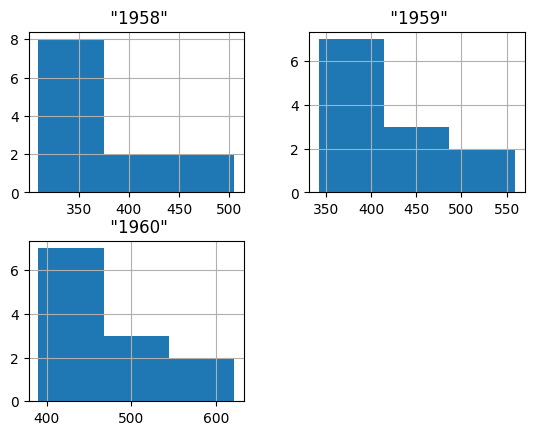

In [ ]:
dfn2.hist(bins=3)
# create histograms for all numeric columns in the DataFrame

<Axes: xlabel='Month'>

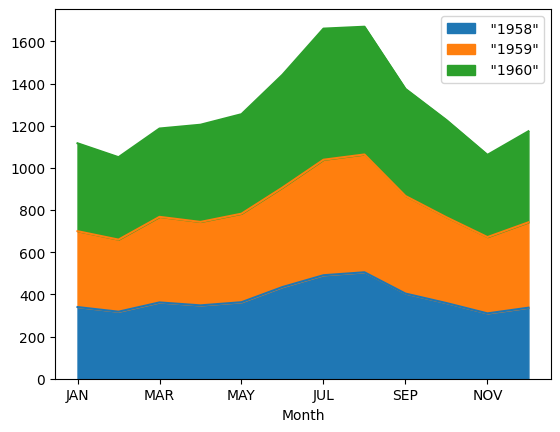

In [ ]:
dfn2.plot.area()
# create area plots for all numeric columns in the DataFrame

<Axes: xlabel='Month'>

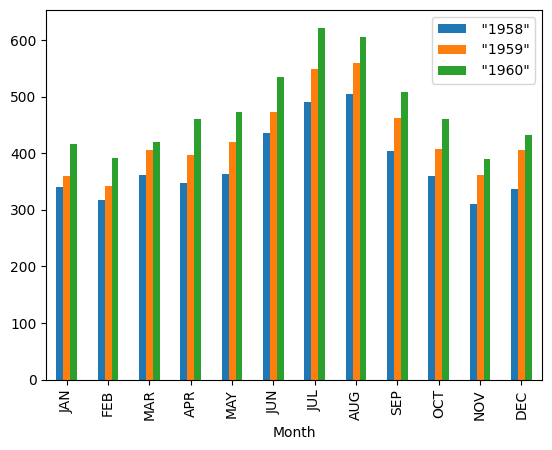

In [ ]:
dfn2.plot.bar()
# create bar plots for all numeric columns in the DataFrame